In [4]:
# Importing libraries required
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using numpy in problem #1 as well
Pandas is used to only import data from trees.csv

In [5]:
def jury(jurors, accuracy, n_trials = 10000):
    # Giving each jury the same accuracy
    jury = [accuracy] * jurors
    # Create a series of outcomes (0=innocent or 1=guilty) to be decided upon
    outcomes = [random.choice([0,1]) for _ in range(n_trials)]
    #Determining the verdict as before
    verdicts = []
    for out in outcomes:
        verdict = []
        for juror in jury:
            if random.random() < juror:
                verdict.append(out)
            else:
                verdict.append(1-out)
        verdicts.append(Counter(verdict).most_common(1)[0][0])
    #Computing the proportion of trials where the jury's verdict was correct
    correct = sum(outcome == verdict for outcome, verdict in zip(outcomes, verdicts))
    return correct / n_trials

In [6]:
# Range of accuracy values to test
accuracies = np.linspace(0.0, 1.0, 100)
# Numbers of jurors to test
n_jurors_list = [11, 21, 31]
# Simulate the trials and compute the accuracy for each number of jurors and accuracy value
results = {}
for n_jurors in n_jurors_list:
    results[n_jurors] = [jury(n_jurors, accuracy) for accuracy in accuracies]

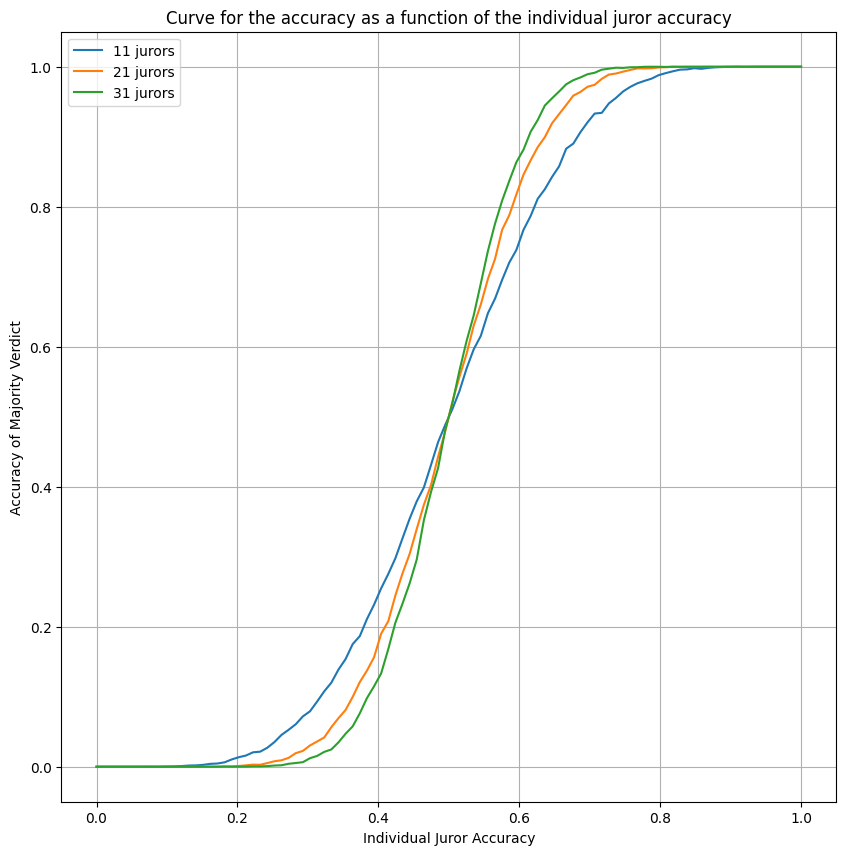

In [7]:
# Plot the results
plt.figure(figsize=(10,10))
for n_jurors, accuracies in results.items():
    plt.plot(np.linspace(0.0, 1.0, 100), accuracies, label=f"{n_jurors} jurors")
plt.xlabel('Individual Juror Accuracy')
plt.ylabel('Accuracy of Majority Verdict')
plt.title('Curve for the accuracy as a function of the individual juror accuracy')
plt.legend()
plt.grid(True)
plt.show()

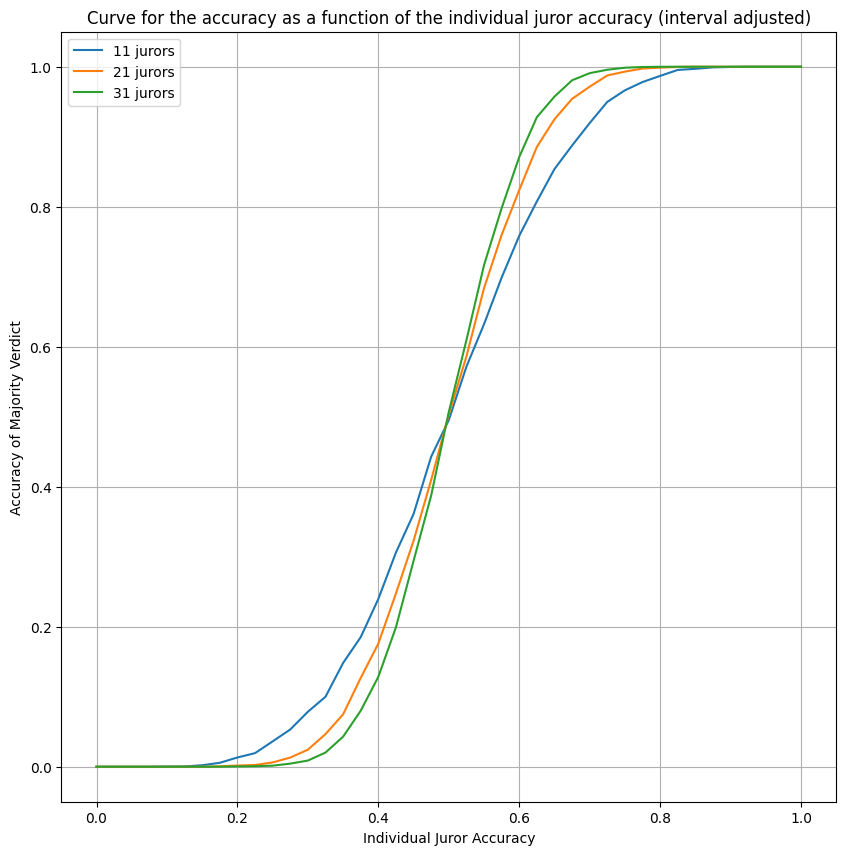

In [8]:
# Range of accuracy values to test (adjusted to 41 intervals)
accuracies = np.linspace(0.0, 1.0, 41)

n_jurors_list = [11, 21, 31]
results = {}
for n_jurors in n_jurors_list:
    results[n_jurors] = [jury(n_jurors, accuracy) for accuracy in accuracies]

plt.figure(figsize=(10,10))

# Plot the results
for n_jurors, accuracies in results.items():
    plt.plot(np.linspace(0.0, 1.0, 41), accuracies, label=f"{n_jurors} jurors")
plt.xlabel('Individual Juror Accuracy')
plt.ylabel('Accuracy of Majority Verdict')
plt.title('Curve for the accuracy as a function of the individual juror accuracy (interval adjusted)')
plt.legend()
plt.grid(True)
plt.show()

PROBLEM 2: Modeling Infection

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 # Number of students
M = 1000 # Number of days
P_sick = 0.15 # fraction of students infected with 24 - hour flu
P_infect = 0.55 # Probability to infect neighbours (Picking a random value)

# Initialising an MxN empty array
students = np.zeros((M,N))

In [10]:
# Infecting students in the group; 0 for healthy and 1 for infected
students[0, :] = np.random.choice([0,1], size = N, p = [1-P_sick, P_sick])

students[0, :]

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

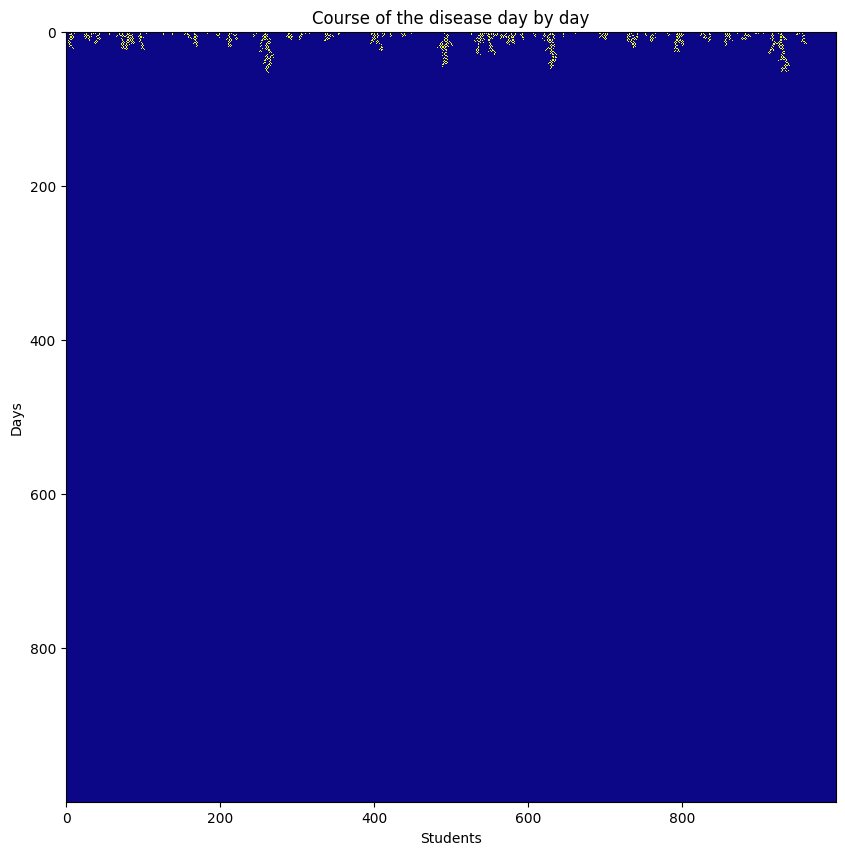

In [11]:
for day in range(1, M):
    for student in range(N):
        if students[day-1, student] == 1:
            students[day, student] = 0
            # No long-term immunity rule
        else:
            if student > 0:
                if students[day - 1, student - 1 ] == 1 and np.random.rand() < P_infect:
                    students[day, student] = 1
            if student < N-1:
                if students[day - 1, student + 1] == 1 and np.random.rand() < P_infect:
                    students[day, student] = 1
            # So we check if there is a student to the left or right of the present student and infect them based on P_infect

plt.figure(figsize=(10,10))
plt.imshow(students, cmap = 'plasma', vmin = 0, vmax = 1, interpolation= 'None')
plt.xlabel('Students')
plt.ylabel('Days')
plt.title('Course of the disease day by day')
plt.show()


Clearly for P_infect = 0.55 the flu does not stay in the population and dies out.

In [12]:
students.min()

0.0

In [13]:
students.max()

1.0

Can you find a value of P_infect where the disease persists in the population without simply dying out (everyone becomes healthy or everyone becomes infected?)

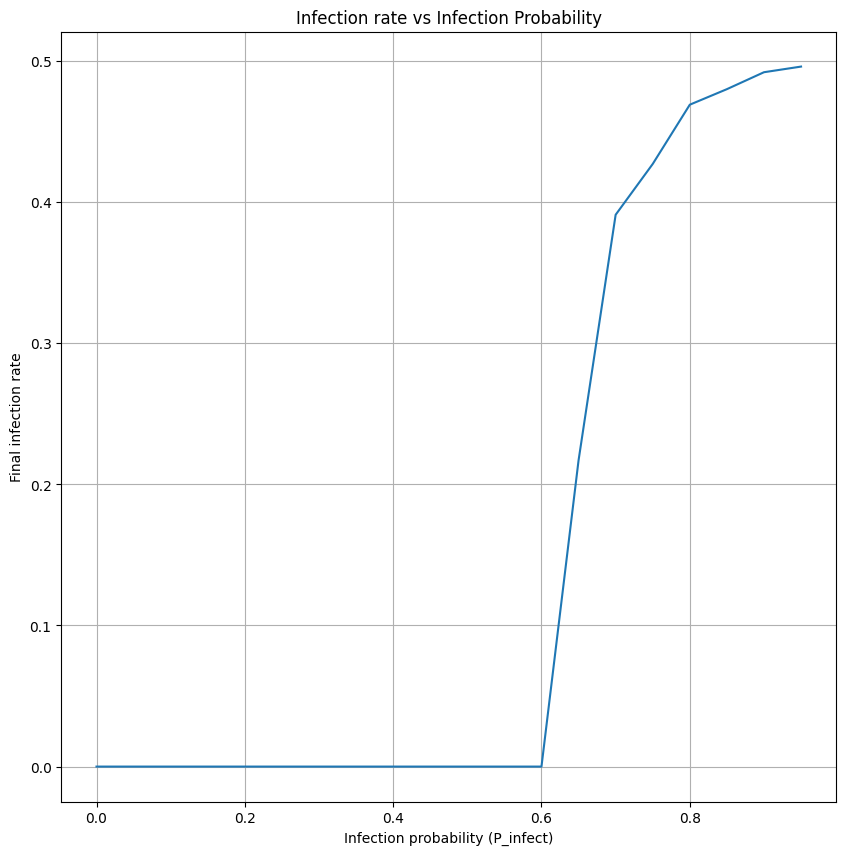

In [14]:
final_infection_rates = []

for P_infect in np.arange(0, 1, 0.05):
    # Initialize a MxN array of zeros; 0 for healthy and 1 for infected
    students = np.zeros((M, N), dtype=int)
    # Initial condition: some students are infected
    students[0, :] = np.random.choice([0,1], size = N, p = [1-P_sick, P_sick])

    for day in range(1, M):
        for student in range(N):
            if students[day-1, student] == 1:
                students[day, student] = 0
            else:
                if student > 0:
                    if students[day - 1, student - 1 ] == 1 and np.random.rand() < P_infect:
                        students[day, student] = 1
                if student < N-1:
                    if students[day - 1, student + 1] == 1 and np.random.rand() < P_infect:
                        students[day, student] = 1

    final_infection_rate = np.mean(students[-1, :] == 1)
    final_infection_rates.append(final_infection_rate)

# Plot final infection rate as a function of P_infect
plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 1, 0.05), final_infection_rates)
plt.xlabel('Infection probability (P_infect)')
plt.ylabel('Final infection rate')
plt.title('Infection rate vs Infection Probability')
plt.grid('True')
plt.show()


From the above if we want the flu to persist in the population we need to pick a value greater than 0.6.

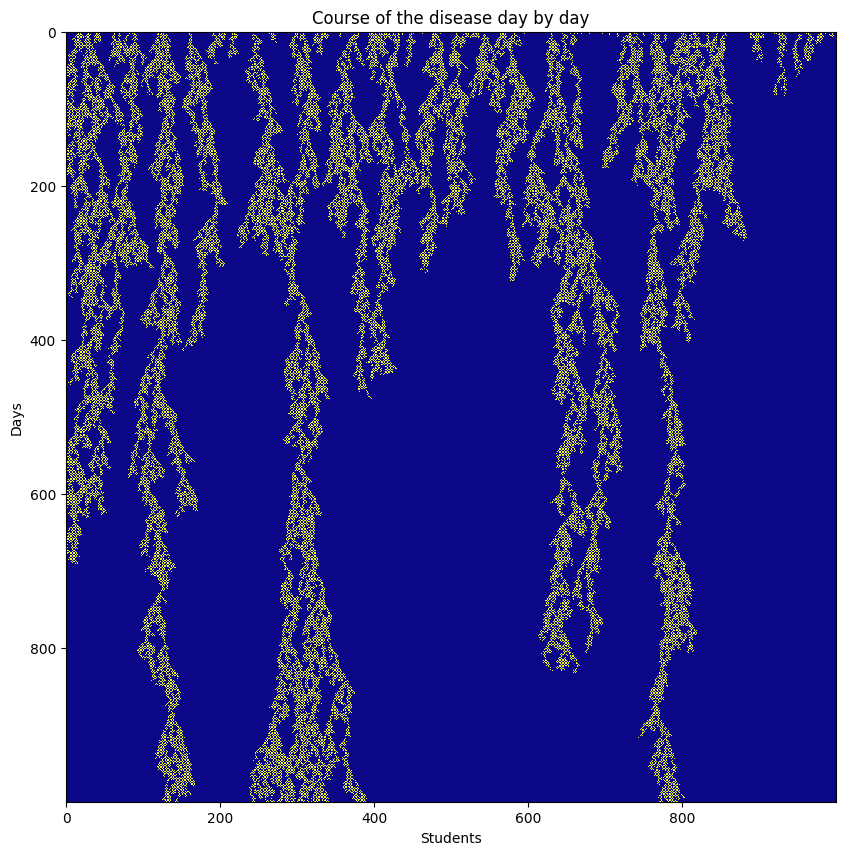

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 # Number of students
M = 1000 # Number of days
P_sick = 0.15 # fraction of students infected with 24 - hour flu
P_infect = 0.635 # Probability to infect neighbours (Picking a random value)

# Initialising an MxN empty array
students = np.zeros((M,N))

# Infecting students in the group; 0 for healthy and 1 for infected
students[0, :] = np.random.choice([0,1], size = N, p = [1-P_sick, P_sick])

for day in range(1, M):
    for student in range(N):
        if students[day-1, student] == 1:
            students[day, student] = 0
            # No long-term immunity rule
        else:
            if student > 0:
                if students[day - 1, student - 1 ] == 1 and np.random.rand() < P_infect:
                    students[day, student] = 1
            if student < N-1:
                if students[day - 1, student + 1] == 1 and np.random.rand() < P_infect:
                    students[day, student] = 1
            # So we check if there is a student to the left or right of the present student and infect them based on P_infect

plt.figure(figsize=(10,10))
plt.imshow(students, cmap = 'plasma', vmin = 0, vmax = 1, interpolation= 'None')
plt.xlabel('Students')
plt.ylabel('Days')
plt.title('Course of the disease day by day')
plt.show()

As shown by the visualisation above with P_sick = 0.625 the flu persists in the population


Extra credit (required for DS5110 students): Plot the % of students that are sick as a function of time for three different values of P_infect .

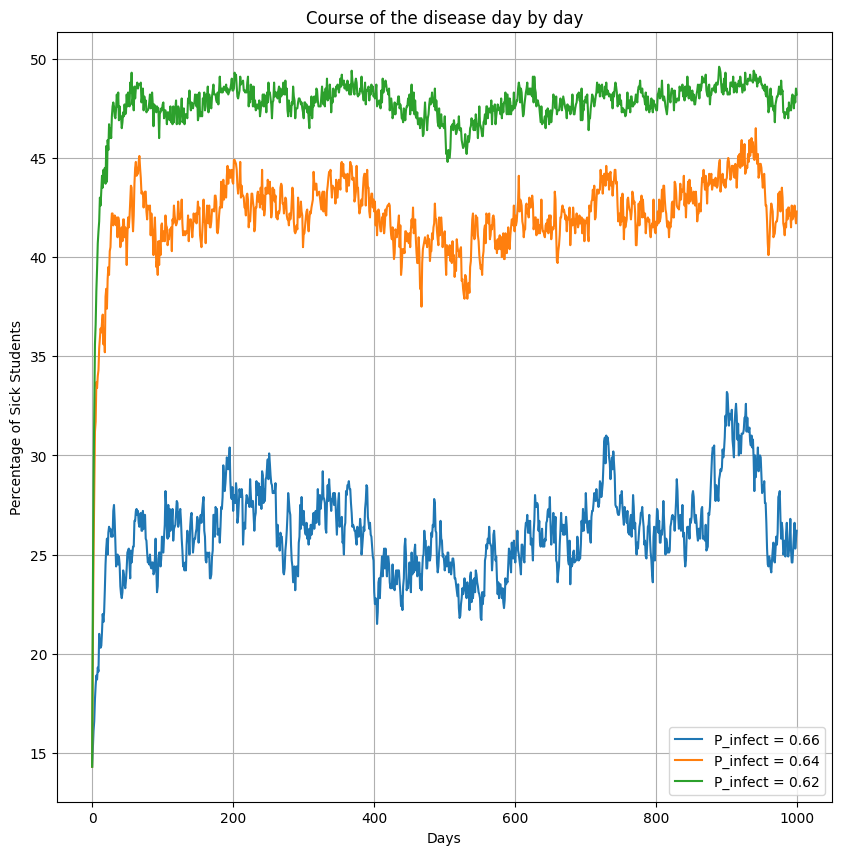

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000  # Number of students
M = 1000  # Number of days
P_sick = 0.15  # fraction of students infected with 24-hour flu
P_infect_values = [0.66, 0.64, 0.62]  # Three different values of P_infect

# Initialize an MxN array of zeros; 0 for healthy and 1 for infected
students = np.zeros((M, N))

# Infecting students in the group; 0 for healthy and 1 for infected
students[0, :] = np.random.choice([0, 1], size=N, p=[1 - P_sick, P_sick])

# List to store the percentage of sick students for each value of P_infect
sick_kids_values = []

for P_infect in P_infect_values:
    for day in range(1, M):
        for student in range(N):
            if students[day - 1, student] == 1:
                students[day, student] = 0
                # No long-term immunity rule
            else:
                if student > 0:
                    if students[day - 1, student - 1] == 1 and np.random.rand() < P_infect:
                        students[day, student] = 1
                if student < N - 1:
                    if students[day - 1, student + 1] == 1 and np.random.rand() < P_infect:
                        students[day, student] = 1
                # So we check if there is a student to the left or right of the present student and infect them based on P_infect

    sick_kids = np.mean(students == 1, axis=1) * 100
    sick_kids_values.append(sick_kids)

plt.figure(figsize=(10,10))
# Plotting the sick percentage as a function of time for each value of P_infect
for i in range(len(P_infect_values)):
    plt.plot(range(M), sick_kids_values[i], label=f'P_infect = {P_infect_values[i]}')

plt.xlabel('Days')
plt.ylabel('Percentage of Sick Students')
plt.title('Course of the disease day by day')
plt.legend()
plt.grid(True)
plt.show()


PROBLEM 3: The Trees of Boston

In [17]:
# Boston boundaries
lat_1 = 42.2
lat_2 = 42.4
lon_1 = -71.2
lon_2 = -70.9

In [18]:
data = pd.read_csv('trees.csv')

In [19]:
data

,X,Y,OBJECTID,TYPE
0,-71.057663,42.354867,1,PARK-TREE
1,-71.057701,42.354878,2,PARK-TREE
2,-71.057797,42.354785,3,PARK-TREE
3,-71.056293,42.354740,4,STREET-TREE
4,-71.056308,42.354822,5,STREET-TREE
...,...,...,...,...
201840,-71.043263,42.370787,201841,PARK-TREE
201841,-71.043513,42.370828,201842,PARK-TREE
201842,-71.043586,42.370871,201843,PARK-TREE
201843,-71.061997,42.371384,201844,PARK-TREE


In [20]:
gridsize = 1000

# Initialise the grid
grid = np.zeros((gridsize,gridsize), dtype= int)

In [21]:
for index, tree in data.iterrows():
    lat, long = tree['Y'], tree['X']

    #Remove the trees outside the defined Boston boundaries
    if not(lat_1 <= lat <= lat_2 and lon_1 <= long <= lon_2):
        continue

    # Position of the tree on the grid. Linear interpolation from one-coordinate system to another.
    # lat_2 is the upper boundary, lat_1 is the lower boundary. lon_1 is the left boundary and lon_2 is the right boundary
    i = int((lat_2 - lat) / (lat_2 - lat_1) * (gridsize - 1))
    j = int((long - lon_1) / (lon_2 - lon_1) * (gridsize - 1))

    # Increment the cell count
    grid[i, j] += 1


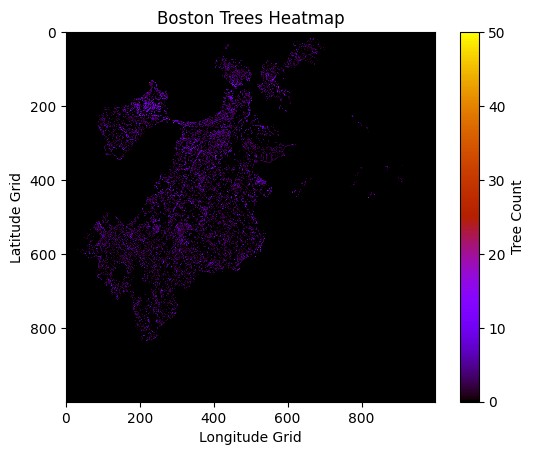

<Figure size 1000x1000 with 0 Axes>

In [22]:
# Create a figure
fig, ax = plt.subplots()

# Create a heatmap based on the grid
heatmap = ax.imshow(grid, cmap='gnuplot', interpolation='None')

plt.figure(figsize=(10,10))
cbar = fig.colorbar(heatmap)
ax.set_xlabel('Longitude Grid')
ax.set_ylabel('Latitude Grid')
cbar.set_label('Tree Count')
ax.set_title('Boston Trees Heatmap')
plt.show()